# Lamb-waves in thin plates

In [1]:
import numpy as np
import sympy as sp
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import scipy.optimize as opt
import scipy.stats as nst
from scipy.fftpack import fft2

sp.init_printing()

EXTENSIE = "pdf"

In [2]:
plt.style.use("seaborn-talk")

In [27]:
%matplotlib notebook

## Constants

In [3]:
ct = 3.18e3 #m/s - velocity of transverse waves
cl = 5.79e3 #m/s - velocity of longitudinal waves
d = 0.001 #m - thickness of the plate

## Theoretische curves

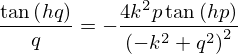

In [4]:
p, q, h, k, omega, f, cp = sp.symbols("p, q, h, k, omega, f, c_p")
LHS = sp.tan(q*h)/q
RHS = -4*k**2*p*sp.tan(p*h)/(q**2-k**2)**2 # for symmetric modes, ^-1 for antisymmetric modes
display(sp.Eq(LHS, RHS))

Find the aproximate locations of roots of the equation above

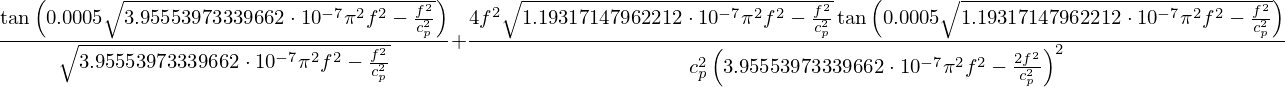

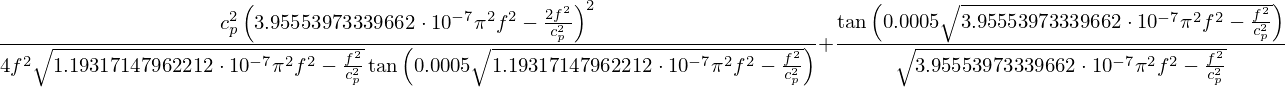

In [5]:
# rewrite te equations for the symmetric and assymetric modes
SM = LHS - RHS
AM = LHS - RHS**-1
# substitute p, q by their formula as a function of ct, cp, k and omega
subs = {p : sp.sqrt((omega/cl)**2 - k**2), q : sp.sqrt((omega/ct)**2 - k**2)}
SM = SM.subs(subs)
AM = AM.subs(subs)
# substitute omega by 2*pi*f
subs = {omega : 2*sp.pi*f, k : f/cp, h : d/2}
SM = SM.subs(subs)
AM = AM.subs(subs)

display(SM, AM)

In [6]:
sm = sp.lambdify([f, cp], SM, "numpy")
am = sp.lambdify([f, cp], AM, "numpy")

In [7]:
# arrays to store the approximate locations of zeros
X = []
Y = []

# range of frequencies and phase velocities to iterate over and steps to take
F = (1e5, 10e8)
F_step = 5e6
C = (6e2, 2e6)
C_step = 50

x1 = F[0]
y1 = C[0]
sgn_sm = np.sign(sm(x1, y1))
x1 += F_step
y1 += C_step
# iterate over the grid, save the points where the sign changes
while x1 <= F[1]:
    while y1 <= C[1]:
        sgn_new = np.sign(sm(x1, y1))
        if sgn_new != sgn_sm:
            X.append(x1)
            Y.append(y1)
            sgn_sm = sgn_new
        x1 += F_step
        y1 += C_step

<string>:2: RuntimeWarning: invalid value encountered in sqrt


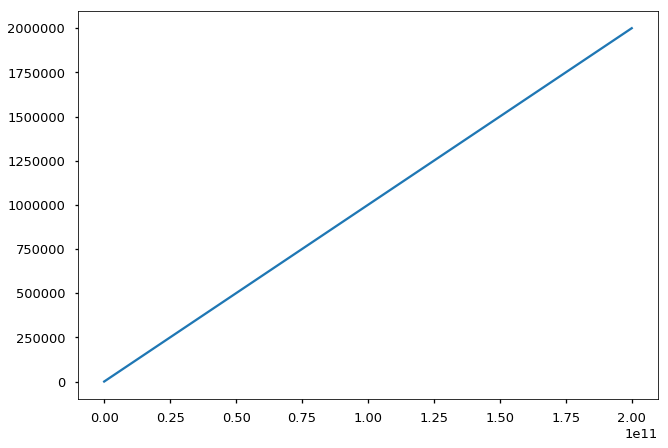

In [8]:
fig, ax = plt.subplots(1,1)

ax.plot(np.array(X), np.array(Y))

plt.show()

## Inladen data

In [9]:
displacement_array = np.loadtxt("metingen/Scanpump_Ch1_0_X0.txt")

distance = 50

while distance <= 50050:
    ar = np.loadtxt("metingen/Scanpump_Ch1_0_X%d.txt" %distance)
    displacement_array = np.vstack([displacement_array, ar])
    distance += 50
    if distance % 5000 == 0:
        print(distance)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000


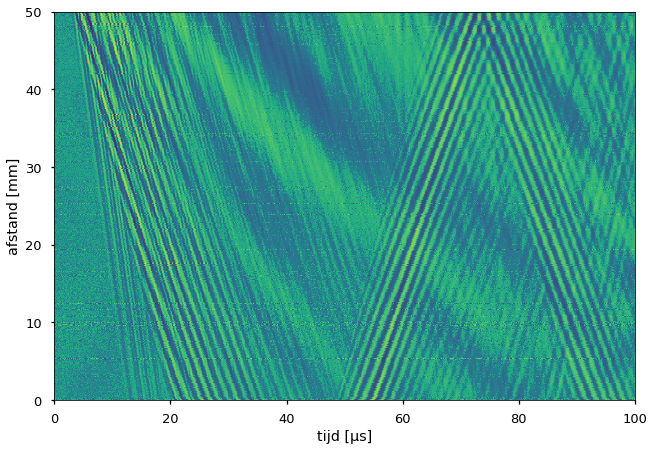

In [10]:
fig, ax = plt.subplots(1,1)

d = np.sign(displacement_array) * np.abs(displacement_array)**0.5
ax.imshow(d, aspect='auto', cmap='viridis', interpolation='none', extent=(0, 100, 0, 50))

ax.set_xlabel("tijd [µs]")
ax.set_ylabel("afstand [mm]")

plt.show()

f_k = fft2(displacement_array)

np.abs(f_k)

fig, ax = plt.subplots(1,1)

#d = np.sign(displacement_array) * np.abs(displacement_array)**0.5
ax.imshow(np.abs(f_k), aspect='auto', cmap='viridis', interpolation='none')

#ax.set_xlabel("tijd [µs]")
#ax.set_ylabel("afstand [mm]")

plt.show()

## Animatie trilling plaat

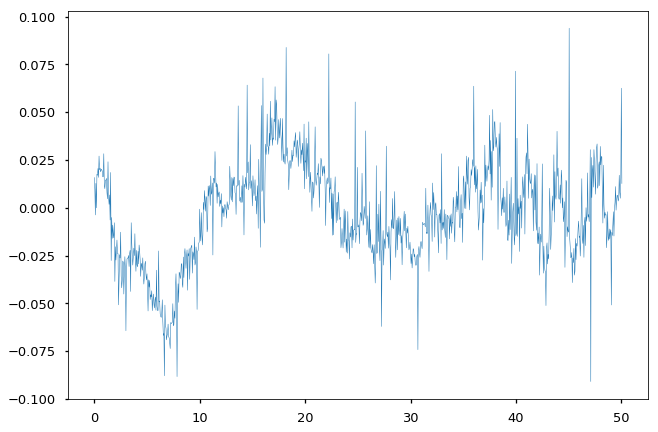

In [21]:
# test plotten spacial data
fig, ax = plt.subplots(1,1)

X = np.arange(0.0, 50.100, 0.05)

ax.plot(X, displacement_array[:,10000], linewidth=0.5)

plt.show()

In [22]:
np.max(displacement_array)

In [23]:
np.min(displacement_array)

In [37]:
np.size(displacement_array[:,1])

<IPython.core.display.Javascript object>


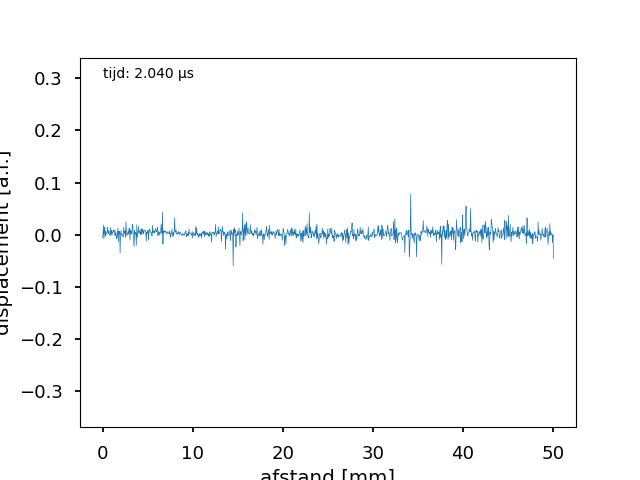

In [38]:
STEP = 10
FRAMES = 1000
fig, ax = plt.subplots(1,1)

X = np.arange(0.0, 50.100, 0.05)

curve, = ax.plot(X, displacement_array[:,0], linewidth=0.5)
text = ax.text(0.0, 0.3, "tijd: %.3f µs" %0.0)

ax.set_ylim(-0.37, 0.34)
ax.set_xlabel("afstand [mm]")
ax.set_ylabel("displacement [a.i.]")

def animate(i):
    curve.set_data(X, displacement_array[:,i*STEP])
    text.set_text("tijd: %.3f µs" %(i*STEP/250))
    
anim = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=50)
plt.show()